<a href="https://colab.research.google.com/github/sowmyad16/bankappgradlerepo/blob/master/Copy_of_bitcoin_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

In [ ]:
pip install statsmodels

In [ ]:
import pandas as pd
bitcoin = pd.read_csv('/content/bitcoin_price.csv')
df_bitcoin=pd.DataFrame(bitcoin)
#print(df_bitcoin)
df_bitcoin = df_bitcoin[['Date','Close']]
df_bitcoin.set_index('Date',inplace = True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency -1D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency -1D will be used.



                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1759
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -12013.312
Method:                       css-mle   S.D. of innovations            223.772
Date:                Mon, 31 May 2021   AIC                          24040.624
Time:                        09:13:26   BIC                          24078.932
Sample:                    02-19-2018   HQIC                         24054.781
                         - 04-28-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.4554      6.170     -1.046      0.296     -18.549       5.638
ar.L1.D.Close     0.1094      0.023      4.663      0.000       0.063       0.155
ar.L2.D.Close    -0.0664      0.024     

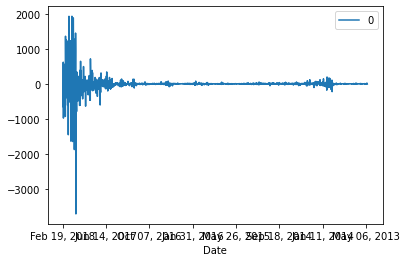

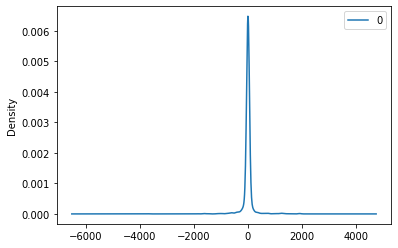

                 0
count  1759.000000
mean      0.034144
std     223.924703
min   -3704.710238
25%      -3.513115
50%       4.784724
75%      11.521929
max    1931.996301


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
model = ARIMA(df_bitcoin, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
from sklearn.metrics import mean_squared_error
X = df_bitcoin.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

Test MAE: 20.611
MSE: 1518.1796076911169


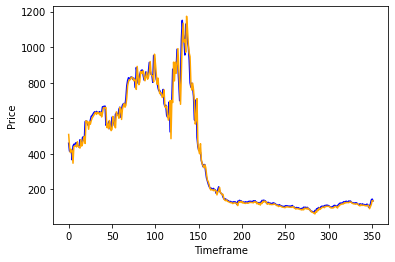

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
error = mean_absolute_error(test, predictions)
MSE=mean_squared_error(test, predictions)
print('Test MAE: %.3f' % error)
print('MSE:',MSE)
# plot
plt.plot(test,color='blue')
plt.plot(predictions, color='orange')
plt.xlabel("Timeframe")
plt.ylabel("Price")
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
import numpy as np
mean_absolute_percentage_error(y_true=test,
                   y_pred=predictions)

5.448295034807417

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [ ]:
a = bitcoin["Close"].fillna(method="backfill")

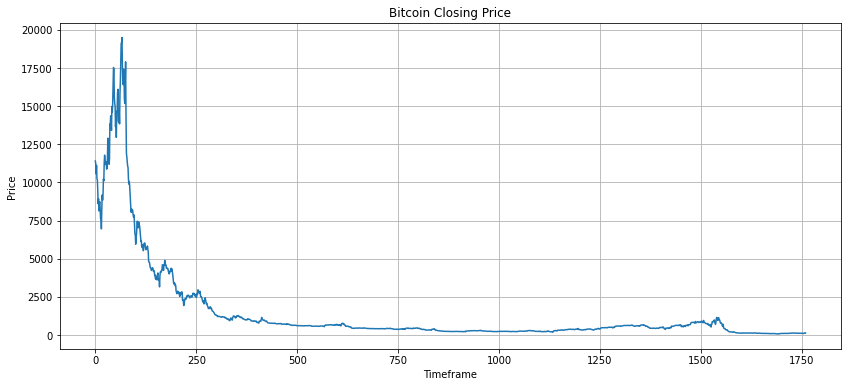

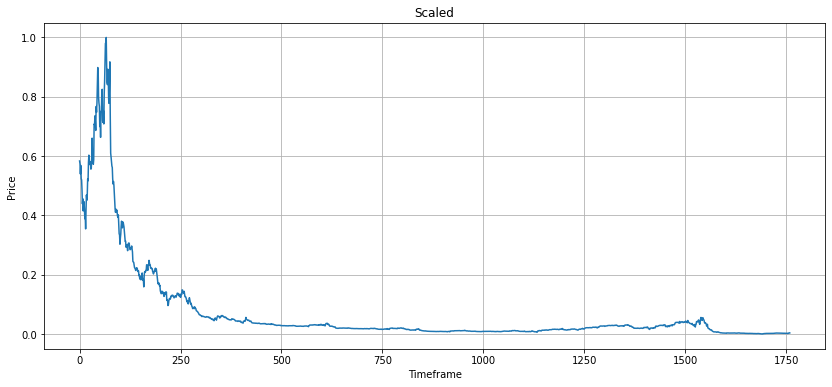

In [ ]:
close_price = np.array(a).reshape(-1,1)
plt.figure(figsize=(14,6))
plt.title("Bitcoin Closing Price")
plt.grid()
plt.xlabel("Timeframe")
plt.ylabel("Price")
plt.plot(close_price)

sc = MinMaxScaler()
close_priceSC = sc.fit_transform(close_price)
plt.figure(figsize=(14,6))
plt.title("Scaled")
plt.grid()
plt.xlabel("Timeframe")
plt.ylabel("Price")
plt.plot(close_priceSC)

In [ ]:
X = []
y = []
for i in range(60, len(close_priceSC)):
    X.append(close_priceSC[i-60:i, 0])
    y.append(close_priceSC[i,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

(1700, 60) (1700,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X.shape,y.shape)

(1700, 60) (1700,)


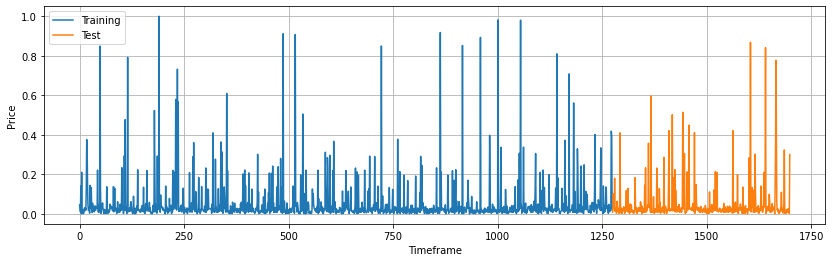

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(range(1275),y_train)
plt.plot(range(1275, len(y)), y_test)
plt.legend(["Training", "Test"])
plt.xlabel("Timeframe")
plt.ylabel("Price")
plt.grid()

In [ ]:
X_train = X_train.reshape(-1,60,1)
X_test = X_test.reshape(-1,60,1)

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_absolute_error')
# Fitting to the training set
regressor.fit(X_train, y_train, epochs=1, batch_size=500)

3/3 [==============================] - 10s 700ms/step - loss: 0.0509


In [ ]:
y_pred = regressor.predict(X_test)
#y_pred=sc.inverse_transform(y_pred.reshape(-1,1))
MAE = mean_absolute_error(y_test, y_pred)
print(MAE)

0.034976337895657066


Text(0, 0.5, 'Price')

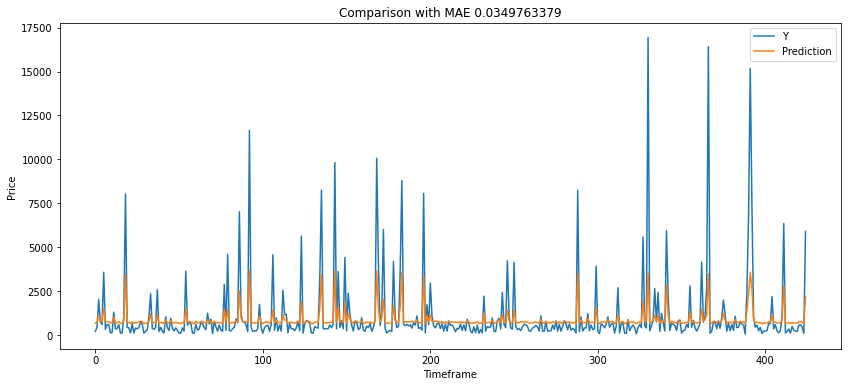

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)))
plt.plot(sc.inverse_transform(y_pred.reshape(-1,1)))
plt.title("Comparison with MAE {0:0.10f}".format(MAE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [ ]:
#y_pred=sc.inverse_transform(y_pred.reshape(-1,1))
#y_test=sc.inverse_transform(y_test.reshape(-1,1))
y_test1=y_test[73:425]

In [ ]:
print(mean_absolute_error(y_true=y_test,
                   y_pred=y_pred))

0.034976337895657066


In [ ]:
print(mean_squared_error(y_true=y_test,
                   y_pred=y_pred))

0.00650476416300038


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from fbprophet import Prophet

In [ ]:
bitcoin = pd.read_csv('/content/bitcoin_price.csv')
df=pd.DataFrame(bitcoin)
df.drop('Open',axis=1,inplace=True)
df.drop('High',axis=1,inplace=True)
df.drop('Low',axis=1,inplace=True)
df.drop('Market Cap',axis=1,inplace=True)
df.drop('Volume',axis=1,inplace=True)
df

,Date,Close
0,"Feb 20, 2018",11403.70
1,"Feb 19, 2018",11225.30
2,"Feb 18, 2018",10551.80
3,"Feb 17, 2018",11112.70
4,"Feb 16, 2018",10233.90
...,...,...
1755,"May 02, 2013",105.21
1756,"May 01, 2013",116.99
1757,"Apr 30, 2013",139.00
1758,"Apr 29, 2013",144.54


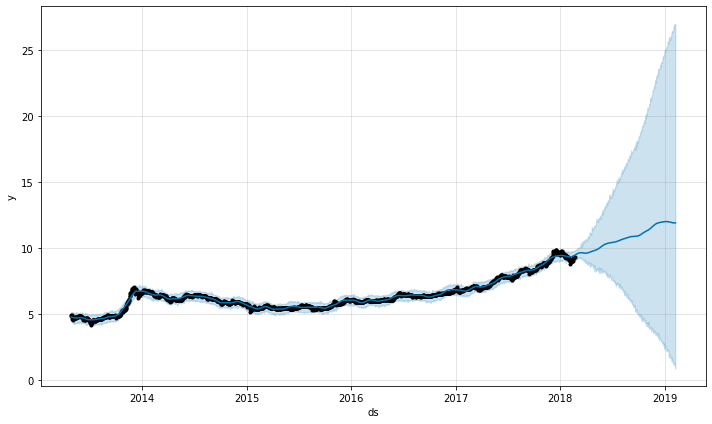

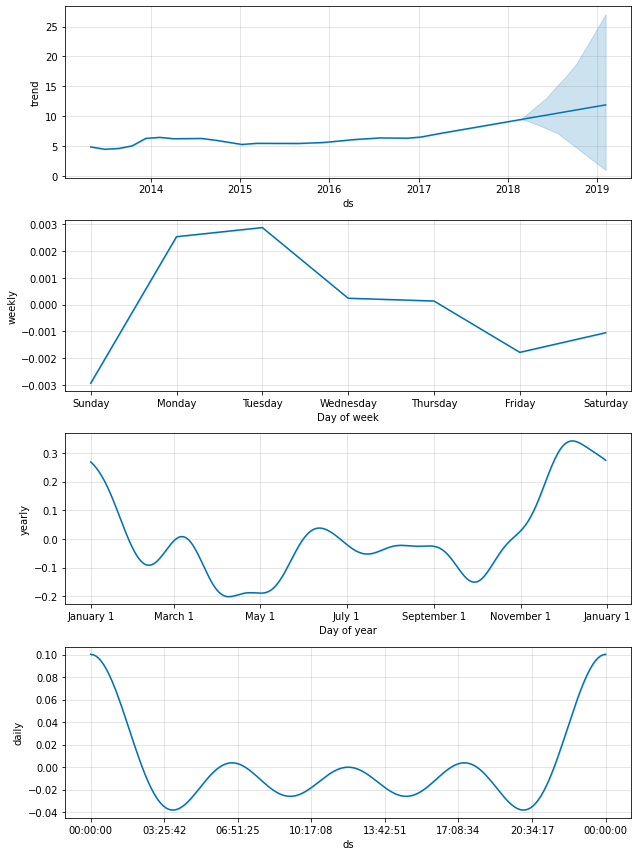

In [ ]:
df.rename(columns={'Date': 'ds', 'Close': 'y'},inplace=True)
# df
df['y']=np.log(df['y'])
m=Prophet(daily_seasonality=True,interval_width=1)

m.fit(df)

future=m.make_future_dataframe(periods=352,freq='D')
future.tail()

pred=m.predict(future)
pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# df.plot(figsize=(15,7))
fig=m.plot(pred)
fig=m.plot_components(pred)
fig.show()

In [ ]:
forecast = m.predict(future)
forecast.tail(n=3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2109,2019-02-05,11.896476,-0.842769,24.127118,-0.765843,24.068366,0.031647,0.031647,0.031647,0.100226,0.100226,0.100226,0.002876,0.002876,0.002876,-0.071454,-0.071454,-0.071454,0.0,0.0,0.0,11.928124
2110,2019-02-06,11.903511,-0.924595,24.204738,-0.797096,24.120262,0.023333,0.023333,0.023333,0.100226,0.100226,0.100226,0.000236,0.000236,0.000236,-0.077129,-0.077129,-0.077129,0.0,0.0,0.0,11.926844
2111,2019-02-07,11.910545,-0.974111,24.038355,-0.828349,24.172159,0.018463,0.018463,0.018463,0.100226,0.100226,0.100226,0.000133,0.000133,0.000133,-0.081896,-0.081896,-0.081896,0.0,0.0,0.0,11.929008


In [ ]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'."""
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [ ]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.tail(n=100)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2018-10-31,11.337118,2.442878,19.460469,NaN
2018-11-01,11.348982,2.293343,19.294892,NaN
2018-11-02,11.359355,2.069017,19.320683,NaN
2018-11-03,11.372780,2.162832,19.515847,NaN
2018-11-04,11.384052,2.315253,19.663037,NaN
...,...,...,...,...
2019-02-03,11.922187,-0.778729,24.046470,NaN
2019-02-04,11.927302,-0.808730,24.095461,NaN
2019-02-05,11.928124,-0.842769,24.127118,NaN


Text(0, 0.5, 'Price')

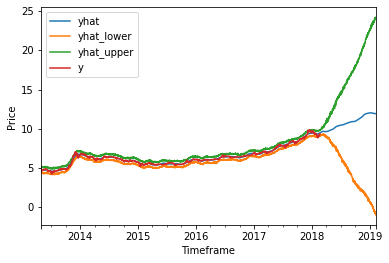

In [ ]:
cmp_df.plot()
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [ ]:
cmp_df1=cmp_df[0:1760]
MAE=mean_absolute_error(y_true=df['y'], y_pred=cmp_df1['yhat'])
print(MAE)
MSE=mean_squared_error(y_true=df['y'],
                   y_pred=cmp_df1['yhat'])
print(MSE)
cmp_df1=cmp_df1['yhat']

1.37936331414614
4.226698492693371


In [ ]:
sc = MinMaxScaler()
d=predictions
predictions = np.array(d).reshape(-1,1)
predictionsSC = sc.fit_transform(predictions)
e=cmp_df1
cmp_df1 = np.array(e).reshape(-1,1)
cmp_df1SC = sc.fit_transform(cmp_df1)

In [ ]:
#print(predictions)
finalpred=[]
'''
l=10000
x1=0
y1=0
z1=0
#for x in range(0,1000):
  #x=x*0.001
  #for y in range(0,1000):
    #y=y*0.001
    #for z in range(0,1000):
      #z=z*0.001
      #if(x+y+z==1):
        #finalpred=[]'''
for i in range(0,352):
  #print(predictions[351][0])
  #print(cmp_df1['yhat'][351])
  #print(y_pred[351][0])
  finalpred.append(predictionsSC[i][0]*0.216+cmp_df1SC[i]*0.372+y_pred[i][0]*0.412)
  '''MAE=mean_absolute_error(y_true=y_test1, y_pred=finalpred)
        if(MAE<l):
          l=MAE
          x1=x
          y1=y
          z1=z
#print(finalpred)
print(l,x1,y1,z1)'''


In [ ]:
'''
sc = MinMaxScaler()
b=finalpred
finalpred = np.array(b).reshape(-1,1)
finalpredSC = sc.fit_transform(finalpred)
#cmp_df1 = np.array(a).reshape(-1,1)
#cmp_df1SC = sc.fit_transform(cmp_df1)
#y_pred = np.array(a).reshape(-1,1)
#y_predSC = sc.fit_transform(y_pred)
#c=y_test1
#y_test1 = np.array(c).reshape(-1,1)
#y_test1SC = sc.fit_transform(y_test1)
'''

'\nsc = MinMaxScaler()\nb=finalpred\nfinalpred = np.array(b).reshape(-1,1)\nfinalpredSC = sc.fit_transform(finalpred)\n#cmp_df1 = np.array(a).reshape(-1,1)\n#cmp_df1SC = sc.fit_transform(cmp_df1)\n#y_pred = np.array(a).reshape(-1,1)\n#y_predSC = sc.fit_transform(y_pred)\n#c=y_test1\n#y_test1 = np.array(c).reshape(-1,1)\n#y_test1SC = sc.fit_transform(y_test1)\n'

0.09899395845395252
0.033422676542879816


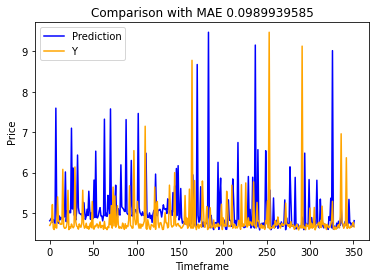

In [ ]:
MAE=mean_absolute_error(y_true=y_test1SC, y_pred=finalpredSC)
print(MAE)
MSE=mean_squared_error(y_true=y_test1SC, y_pred=finalpredSC)
print(MSE)
plt.plot(sc.inverse_transform(finalpredSC.reshape(-1,1)),color='blue')
plt.plot(sc.inverse_transform(y_test1SC.reshape(-1,1)),color='orange')
plt.title("Comparison with MAE {0:0.10f}".format(MAE))
plt.legend(["Prediction","Y"])
plt.xlabel("Timeframe")
plt.ylabel("Price")
plt.show()